In [68]:
import numpy as np
from tensorflow import keras
from keras.datasets import fashion_mnist

In [69]:
# Загрузка данных
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

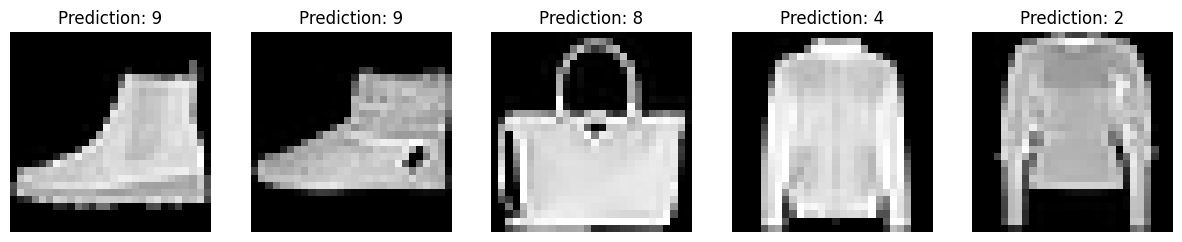

In [80]:
import random

indices = random.sample(range(len(train_images)), 5)

fig, axs = plt.subplots(1, 5, figsize=(15, 15))

for i, idx in enumerate(indices):
    img = np.reshape(train_images[idx], (28, 28))
    axs[i].imshow(img, cmap='gray')
    axs[i].axis('off')

    axs[i].set_title("Class: {}".format(train_labels[idx]))
    

In [81]:
print(train_images.shape)
print(type(train_images[0]))
print(len(train_images[0]))

(60000, 28, 28)
<class 'numpy.ndarray'>
28


In [189]:
# Нормализация данных
train_images = train_images / 255.0
test_images = test_images / 255.0

In [253]:
from tensorflow import keras


# Определение модели
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    #keras.layers.Dense(128, activation='relu'),
    #keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Компиляция модели
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [254]:
model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_24 (Flatten)        (None, 784)               0         
                                                                 
 dense_99 (Dense)            (None, 512)               401920    
                                                                 
 dense_100 (Dense)           (None, 256)               131328    
                                                                 
 dense_101 (Dense)           (None, 128)               32896     
                                                                 
 dense_102 (Dense)           (None, 64)                8256      
                                                                 
 dense_103 (Dense)           (None, 10)                650       
                                                                 
Total params: 575,050
Trainable params: 575,050
Non-t

In [255]:
# Обучение модели
history = model.fit(train_images, train_labels, epochs=14, batch_size=32, validation_split=0.2)

Epoch 1/14
1500/1500 [==============================] - 8s 4ms/step - loss: 0.8131 - accuracy: 0.6953 - val_loss: 0.6240 - val_accuracy: 0.7739
Epoch 2/14
1500/1500 [==============================] - 7s 5ms/step - loss: 0.5339 - accuracy: 0.8041 - val_loss: 0.4828 - val_accuracy: 0.8238
Epoch 3/14
1500/1500 [==============================] - 7s 4ms/step - loss: 0.4511 - accuracy: 0.8349 - val_loss: 0.4331 - val_accuracy: 0.8410
Epoch 4/14
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4062 - accuracy: 0.8515 - val_loss: 0.4004 - val_accuracy: 0.8531
Epoch 5/14
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3823 - accuracy: 0.8593 - val_loss: 0.3760 - val_accuracy: 0.8621
Epoch 6/14
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3638 - accuracy: 0.8665 - val_loss: 0.3978 - val_accuracy: 0.8537
Epoch 7/14
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3471 - accuracy: 0.8716 - val_loss: 0.3525 - val_accuracy:

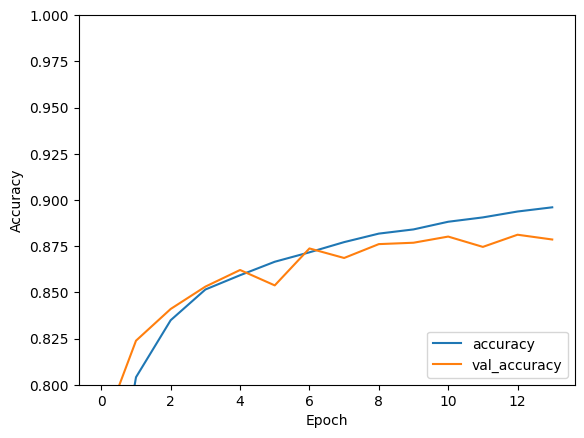

In [256]:
import matplotlib.pyplot as plt


# Графики обучения
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1])
plt.legend(loc='lower right')
plt.show()

In [257]:
# Оценка модели на тестовых данных
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('Test accuracy:', test_acc)

313/313 - 1s - loss: 0.3639 - accuracy: 0.8695 - 1s/epoch - 4ms/step
Test accuracy: 0.8694999814033508


1/1 [==============================] - 0s 19ms/step


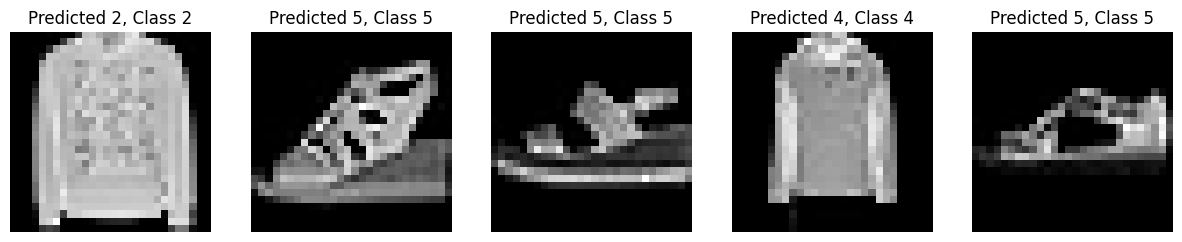

In [259]:
indices = random.sample(range(len(test_images)), 5)

fig, axs = plt.subplots(1, 5, figsize=(15, 15))

for i, idx in enumerate(indices):
    img = np.reshape(test_images[idx], (28, 28))
    axs[i].imshow(img, cmap='gray')
    axs[i].axis('off')

    pred = np.argmax(model.predict(np.array([test_images[idx]])))
    
    axs[i].set_title("Predicted {}, Class {}".format(pred, test_labels[idx]))